In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline


### Create a classification model to predict those who will likely accept the offer of a new personal loan , by analyzing the previous historical campaign's customer behaviour data.

- Age	Customer's age in completed years							
- Experience	#years of professional experience							
- Income	Annual income of the customer 						
- Family	Family size of the customer					
- CCAvg	Avg. spending on credit cards per month 						
- Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
- Mortgage	Value of house mortgage if any. 							
- Securities Account	Does the customer have a securities account with the bank?							
- CD Account	Does the customer have a certificate of deposit (CD) account with the bank?							
- Online	Does the customer use internet banking facilities							
- CreditCard	Does the customer use a credit card issued by Bank?							
- Offer_acceptance	Did this customer accept the personal loan offered in the last campaign?							


In [10]:
import pandas as pd

In [11]:
input_data = pd.read_excel('Target_Customer_Prediction.xlsx')

In [12]:
input_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Offer_acceptance
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,1


In [13]:
labels = list(input_data.columns.values)
# types = list(type(input_data.columns.values))

input_types = [(label, type(input_data[label][0])) for label in labels]

input_types

[('Age', numpy.int64),
 ('Experience', numpy.int64),
 ('Income', numpy.int64),
 ('Family', numpy.int64),
 ('CCAvg', numpy.float64),
 ('Education', numpy.int64),
 ('Mortgage', numpy.int64),
 ('Securities Account', numpy.int64),
 ('CD Account', numpy.int64),
 ('Online', numpy.int64),
 ('CreditCard', numpy.int64),
 ('Offer_acceptance', numpy.int64)]

In [14]:
input_data.shape

(5000, 12)

In [15]:
x = input_data.drop(['Offer_acceptance'], axis=1)
y = input_data['Offer_acceptance']

In [16]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3 )

In [18]:
from sklearn import tree 
ctree = tree.DecisionTreeClassifier()
ctree.fit(x_train, y_train)
y_pred = ctree.predict(x_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8066666666666666


In [19]:
comp_df = pd.DataFrame()
comp_df['Class_actual'] = y_test
comp_df['Class_predicted'] = y_pred
comp_df.head(5)

,Class_actual,Class_predicted
4802,0,0
2752,0,0
771,0,0
3922,0,0
2687,0,0


In [20]:
y_test.value_counts(normalize=True)

Offer_acceptance
0    0.816
1    0.184
Name: proportion, dtype: float64

In [21]:
ctree.feature_importances_

array([0.07841199, 0.08736458, 0.29574156, 0.10646033, 0.109634  ,
       0.19991416, 0.06019569, 0.00872827, 0.01605833, 0.03156057,
       0.0059305 ])

In [22]:
temp_imp = pd.DataFrame()
temp_imp['col'] = x.columns
temp_imp['imp'] = ctree.feature_importances_*100

temp_imp

,col,imp
0,Age,7.841199
1,Experience,8.736458
2,Income,29.574156
3,Family,10.646033
4,CCAvg,10.963400
5,Education,19.991416
6,Mortgage,6.019569
7,Securities Account,0.872827
8,CD Account,1.605833
9,Online,3.156057


In [23]:
temp_imp.sort_values('imp', ascending=False)

,col,imp
2,Income,29.574156
5,Education,19.991416
4,CCAvg,10.963400
3,Family,10.646033
1,Experience,8.736458
0,Age,7.841199
6,Mortgage,6.019569
9,Online,3.156057
8,CD Account,1.605833
7,Securities Account,0.872827


#### Model Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [2, 3, 4, 5, 6, 7 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_split"  : [3, 5, 10 ],
               "max_depth"          : [2,3,4,5] ,
               "class_weight"      : [{0:1, 1:2}, {0:1, 1:5}]
               }



In [26]:
ctree_model = tree.DecisionTreeClassifier()

In [27]:
#optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'accuracy', cv = 5, verbose=3)
optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'recall', cv = 5, verbose=3)

In [28]:
optimized_tree.fit(x_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best;, score=0.583 total time=   0.0s
[CV 2/5] END class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best;, score=0.362 total time=   0.0s
[CV 3/5] END class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best;, score=0.213 total time=   0.0s
[CV 4/5] END class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best;, score=0.528 total time=   0.0s
[CV 5/5] END class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best;, score=0.173 total time=   0.0s
[CV 1/5] END class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=random;, score=0.409 total time=   0.0s
[CV 2/5] END cla

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=3)

In [29]:
optimized_tree.best_params_

{'class_weight': {0: 1, 1: 5},
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 3,
 'min_samples_split': 10,
 'splitter': 'random'}

In [30]:
optimized_tree.best_estimator_

DecisionTreeClassifier(class_weight={0: 1, 1: 5}, criterion='entropy',
                       max_depth=2, max_features=3, min_samples_split=10,
                       splitter='random')

In [31]:
optimized_tree.best_score_

0.7496062992125984

In [32]:
#optimized_tree.cv_results_

In [33]:
ctree_final = optimized_tree.best_estimator_

y_pred = ctree_final.predict(x_test)
metrics.accuracy_score(y_test, y_pred) 

0.6753333333333333

In [34]:
y_pred_prob = ctree_final.predict_proba(x_test)
cust_likelihood = y_pred_prob[ :,  1]*100
cust_likelihood

array([82.4795082 , 41.55276107, 41.55276107, ..., 41.55276107,
       36.59476117, 36.59476117])

In [35]:
comp_df = x_test.copy()
comp_df['actual'] = y_test
comp_df['predicted'] = y_pred
comp_df['propensity'] = cust_likelihood
 
comp_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,actual,predicted,propensity
4802,35,11,58,3,2.800000,1,0,0,0,1,0,0,1,82.479508
2752,51,25,34,3,0.900000,3,111,0,0,1,0,0,0,41.552761
771,42,18,71,3,2.333333,1,106,1,0,1,0,0,0,41.552761
3922,31,4,20,4,1.500000,2,0,0,0,1,0,0,0,41.552761
2687,52,27,135,1,0.600000,1,452,0,0,1,0,0,0,36.594761


In [36]:
metrics.recall_score(y_test, y_pred)

0.605072463768116

In [37]:
metrics.precision_score(y_test, y_pred)

0.30642201834862387

In [38]:
y_test.value_counts()

Offer_acceptance
0    1224
1     276
Name: count, dtype: int64

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test, y_pred)

array([[846, 378],
       [109, 167]])

In [41]:
metrics.recall_score(y_test, y_pred)

0.605072463768116

In [42]:
metrics.precision_score(y_test, y_pred)

0.30642201834862387

#### Model Predicted Probability

In [43]:
x_test.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4802,35,11,58,3,2.800000,1,0,0,0,1,0
2752,51,25,34,3,0.900000,3,111,0,0,1,0
771,42,18,71,3,2.333333,1,106,1,0,1,0
3922,31,4,20,4,1.500000,2,0,0,0,1,0
2687,52,27,135,1,0.600000,1,452,0,0,1,0


In [44]:
y_pred_prob = ctree_final.predict_proba(x_test)
y_pred_prob

array([[0.17520492, 0.82479508],
       [0.58447239, 0.41552761],
       [0.58447239, 0.41552761],
       ...,
       [0.58447239, 0.41552761],
       [0.63405239, 0.36594761],
       [0.63405239, 0.36594761]])

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [2, 3, 4, 5, 6, 7 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_split"  : [3, 5, 10 ],
               "max_depth"          : [2,3,4,5] 
#               "class_weight"      : [{0:1, 1:2}, {0:1, 1:5}]
               }
ctree_model = tree.DecisionTreeClassifier()
optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'accuracy', cv=5) 
optimized_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [46]:
ctree_final = optimized_tree.best_estimator_
y_pred = ctree_final.predict(x_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred) )
print('Sensitivity :', metrics.recall_score(y_test, y_pred))
print('Precision :', metrics.precision_score(y_test, y_pred))

Accuracy : 0.8866666666666667
Sensitivity : 0.427536231884058
Precision : 0.9076923076923077


In [47]:
y_pred_prob = ctree_final.predict_proba(x_test)
y_pred_prob

array([[0.90106205, 0.09893795],
       [0.90106205, 0.09893795],
       [0.90106205, 0.09893795],
       ...,
       [0.90106205, 0.09893795],
       [0.86666667, 0.13333333],
       [0.90106205, 0.09893795]])

In [48]:
# prediction class based on default threshold prob = 0.5
df_prediction = x_test.copy()
df_prediction['actual_class'] = y_test
df_prediction['pred_class'] = y_pred
df_prediction['prob_1'] = y_pred_prob[:,1]
df_prediction.head(25)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,actual_class,pred_class,prob_1
4802,35,11,58,3,2.800000,1,0,0,0,1,0,0,0,0.098938
2752,51,25,34,3,0.900000,3,111,0,0,1,0,0,0,0.098938
771,42,18,71,3,2.333333,1,106,1,0,1,0,0,0,0.098938
3922,31,4,20,4,1.500000,2,0,0,0,1,0,0,0,0.098938
2687,52,27,135,1,0.600000,1,452,0,0,1,0,0,0,0.057471
3100,52,27,81,4,3.800000,2,0,0,0,0,1,0,0,0.158333
2493,34,9,49,1,2.500000,3,0,0,0,0,0,0,0,0.098938
1305,32,6,28,2,0.300000,2,88,0,0,1,0,0,0,0.098938
88,65,41,51,2,1.100000,1,0,0,0,1,0,0,0,0.098938
184,52,26,63,2,1.500000,2,0,1,0,1,0,0,0,0.098938


### ROC Curver and Area under Curve (AUC) : 
- Provide the sensitivity and specificity values for differrent threshold values without actually changing the threshold.
- ROC will help to choosing the threshold that balance the sensitivity and specificity

In [49]:
print(metrics.roc_auc_score(y_test, y_pred))

0.7088661551577153


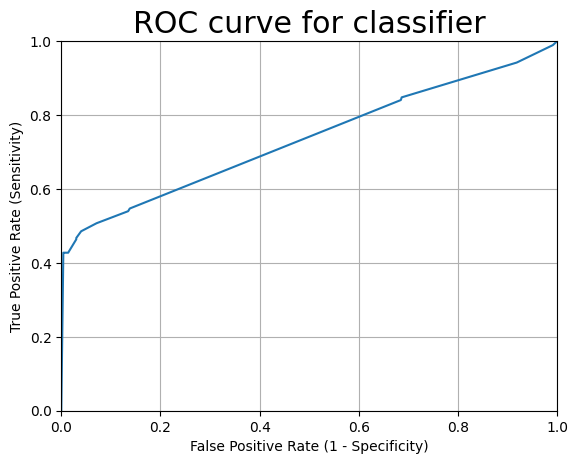

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 18
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- AUC is the percentage of the ROC plot that is underneath the curve:
- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will   
   assign a higher predicted probability to the positive observation.

In [51]:
df_threshold = pd.DataFrame()
df_threshold['tpr'] = tpr
df_threshold['fpr'] = fpr
df_threshold['prob'] = thresholds  # probability(1)
df_threshold

,tpr,fpr,prob
0,0.000000,0.000000,inf
1,0.420290,0.004085,1.000000
2,0.427536,0.004085,0.636364
3,0.427536,0.004902,0.600000
4,0.427536,0.009804,0.571429
5,0.427536,0.013889,0.400000
6,0.463768,0.030229,0.397260
7,0.467391,0.030229,0.250000
8,0.485507,0.040033,0.212121
9,0.507246,0.071078,0.158333


In [52]:
# prediction class based on new threshold prob = 0.11
df_prediction.loc[df_prediction['prob_1'] >=.108, 'pred_class_new'] = '1'
df_prediction.loc[df_prediction['prob_1'] <.108, 'pred_class_new'] = '0'
df_prediction['pred_class_new'] = df_prediction['pred_class_new'].astype(int)
df_prediction.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,actual_class,pred_class,prob_1,pred_class_new
4802,35,11,58,3,2.800000,1,0,0,0,1,0,0,0,0.098938,0
2752,51,25,34,3,0.900000,3,111,0,0,1,0,0,0,0.098938,0
771,42,18,71,3,2.333333,1,106,1,0,1,0,0,0,0.098938,0
3922,31,4,20,4,1.500000,2,0,0,0,1,0,0,0,0.098938,0
2687,52,27,135,1,0.600000,1,452,0,0,1,0,0,0,0.057471,0
3100,52,27,81,4,3.800000,2,0,0,0,0,1,0,0,0.158333,1
2493,34,9,49,1,2.500000,3,0,0,0,0,0,0,0,0.098938,0
1305,32,6,28,2,0.300000,2,88,0,0,1,0,0,0,0.098938,0
88,65,41,51,2,1.100000,1,0,0,0,1,0,0,0,0.098938,0
184,52,26,63,2,1.500000,2,0,1,0,1,0,0,0,0.098938,0


In [53]:
# accuracy at threshold=.13
print( 'accuracy = ' , metrics.accuracy_score(df_prediction.actual_class, df_prediction.pred_class_new))
print( 'sensitivity(tpr) = ' , metrics.recall_score(df_prediction.actual_class, df_prediction.pred_class_new))
print( 'precision = ' , metrics.precision_score(df_prediction.actual_class, df_prediction.pred_class_new))

accuracy =  0.804
sensitivity(tpr) =  0.5471014492753623
precision =  0.471875


#### Model Variance 

In [54]:
ctree_final.fit(x_train, y_train)
#
y_pred = ctree_final.predict(x_test)
metrics.accuracy_score(y_test, y_pred) 

0.89

In [55]:
import numpy as np

k = 50
perf = []
models = []


for i in range(k):
    models.append(ctree_final.fit(x_train, y_train))
    y_pred = ctree_final.predict(x_test)
    perf.append(metrics.accuracy_score(y_test, y_pred))
    
perf = np.array(perf)
print(perf)
print('Avg Performance :', perf.mean())
print('Model Variance  :' , perf.std())
    

[0.892      0.89533333 0.89266667 0.88133333 0.88333333 0.88533333
 0.882      0.87133333 0.86866667 0.84933333 0.88533333 0.882
 0.89066667 0.88533333 0.88733333 0.86       0.88933333 0.886
 0.888      0.894      0.892      0.89       0.88933333 0.88466667
 0.88733333 0.89333333 0.888      0.89066667 0.89533333 0.89333333
 0.88733333 0.894      0.89133333 0.87733333 0.89333333 0.89533333
 0.89066667 0.88866667 0.89533333 0.89466667 0.88733333 0.88333333
 0.892      0.89       0.88733333 0.89266667 0.882      0.88666667
 0.892      0.89      ]
Avg Performance : 0.8868933333333334
Model Variance  : 0.008709239027862564


In [56]:
avg_perf = np.zeros_like(perf, dtype=float)
avg_perf.fill(perf.mean())
print(avg_perf)

[0.88689333 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333
 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333
 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333
 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333
 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333
 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333
 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333
 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333 0.88689333
 0.88689333 0.88689333]


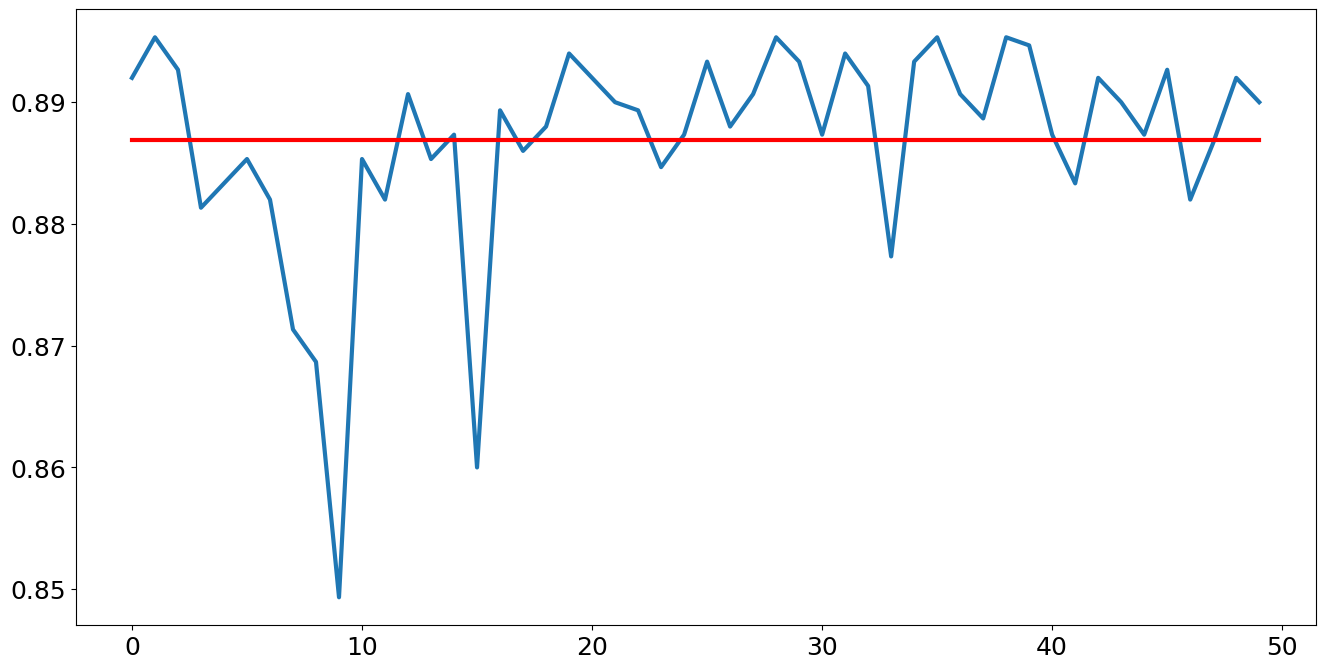

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"]=(16,8) 
plt.plot(perf, linewidth=3)
plt.plot(avg_perf, 'r', linewidth=3)

In [72]:
import joblib
from onnxmltools import convert_sklearn

onnx_model = convert_sklearn(ctree_final, 'ONNXmodel', initial_types=input_types)

TypeError: 'getset_descriptor' object is not iterable

In [58]:
import pickle
pickle.dump(ctree_final, open('Bank_Cust_Pred_Ctree_22_may.pk', 'wb'))

In [62]:
import joblib

loaded_model = joblib.load('Bank_Cust_Pred_Ctree_22_may.pk')

In [63]:
import joblib
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Define the initial types for the ONNX conversion
input_types = [('float_input', FloatTensorType([None, 11]))]  # Adjust the input shape and type as needed

# Convert the sklearn model to ONNX format
onnx_model = convert_sklearn(loaded_model, initial_types=input_types)

# Save the converted ONNX model to a file
onnx_model_path = 'Bank_Cust_Pred_Ctree_22_may.onnx'
with open(onnx_model_path, 'wb') as f:
    f.write(onnx_model.SerializeToString())

print(f"Model successfully converted and saved to {onnx_model_path}")

Model successfully converted and saved to Bank_Cust_Pred_Ctree_22_may.onnx
